In [1]:
from lib.data.utils import train_data, targets, features, split_dataframe
from lib.data.plot import plot_predictions
from lib.models import DummyModel, PollutionEstimator
from lib.models.insta import PollutionDensePredictor
from lib.models.forecast import PollutionRnn

import tensorflow as tf
from keras.callbacks import TensorBoard as TB, EarlyStopping as ES
import pandas as pd
import seaborn as sns
sns.set_theme("notebook", style="whitegrid", rc={"figure.dpi": 72})

data_dir = "../data/"

df = train_data(data_dir, delta=False)
(train_df, train_split), test_df = split_dataframe(df, 0.2, 0.0)

In [4]:
compilation_kwargs = {"loss": "mse"}
with tf.device("/CPU:0"):
    model = DummyModel()
    estimator = PollutionEstimator(features, targets, input_days=model.input_days, output_days=model.output_days,
                                   offset_hours=model.offset_hours, shift_hours=model.shift_hours, pollution_model=model, compilation_kwargs=compilation_kwargs)
    estimator.compile(**compilation_kwargs)

In [6]:
estimator.summary()

Model: "pollution_estimator_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 72, 8)            17        
 ion)                                                            
                                                                 
 dummy_model (DummyModel)    (None, 24, 3)             41544     
                                                                 
 reshape_4 (Reshape)         (None, 24, 3)             0         
                                                                 
 normalization_3 (Normalizat  (None, 24, 3)            7         
 ion)                                                            
                                                                 
Total params: 41,568
Trainable params: 41,544
Non-trainable params: 24
_________________________________________________________________


In [5]:
with tf.device("/CPU:0"):
    estimator.train(train_df, 20, callbacks=[TB("../logs"), ES(patience=30, restore_best_weights=True)])

Epoch 1/20


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

      1/Unknown - 0s 278ms/step

2023-03-30 20:58:59.644773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-30 20:58:59.745087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 8ms/step


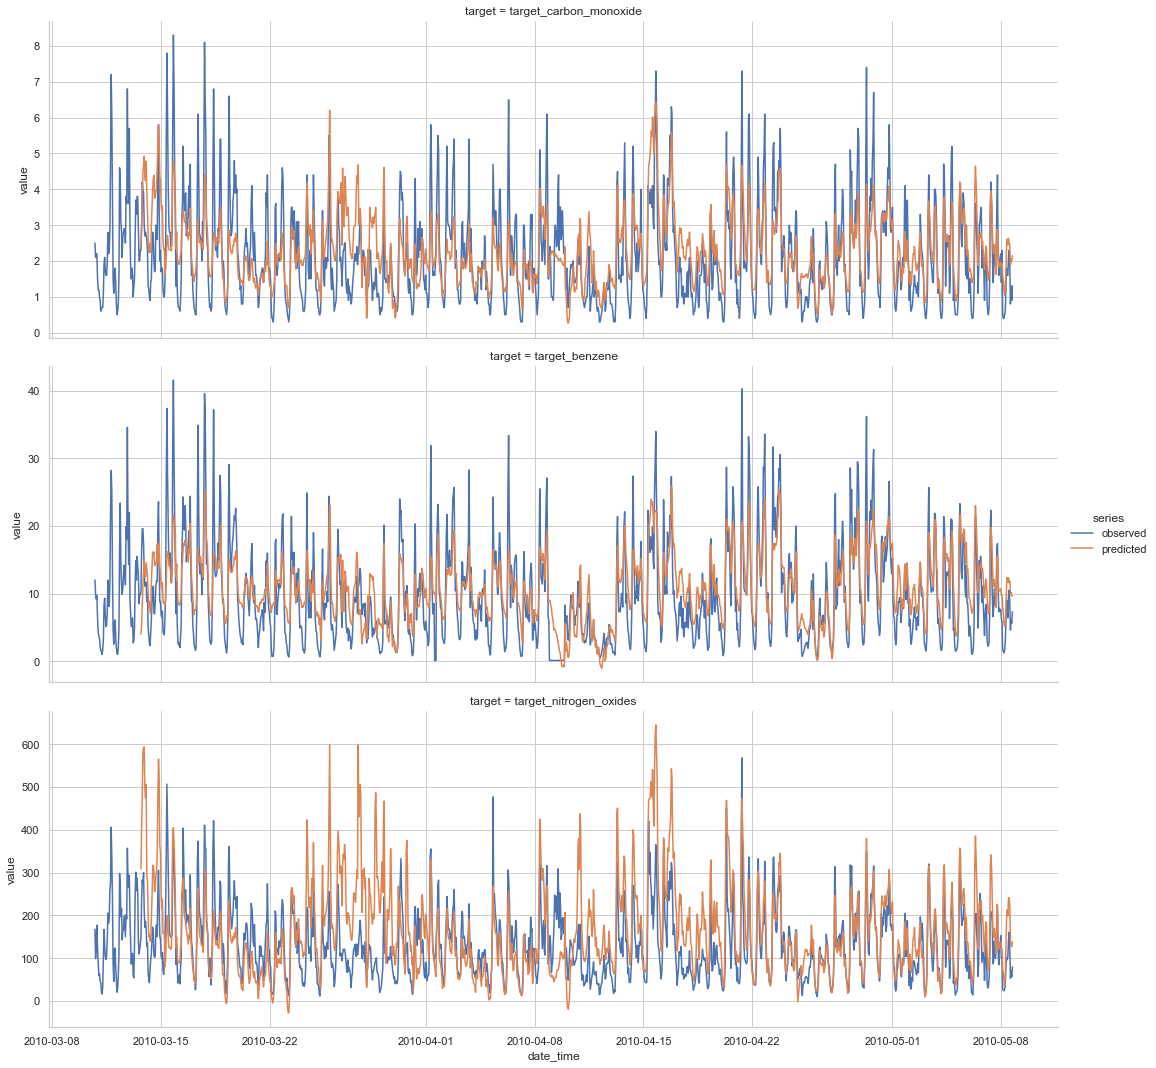

In [4]:
plot_predictions(test_df, estimator, aspect=3, facet_kws={"sharey": False})

In [8]:
estimator.save("../models/forecast")

INFO:tensorflow:Assets written to: ../models/forecast/assets


INFO:tensorflow:Assets written to: ../models/forecast/assets


In [7]:
estimator.summary()

Model: "pollution_estimator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 17        
 n)                                                              
                                                                 
 pollution_rnn (PollutionRnn  multiple                 5827      
 )                                                               
                                                                 
 normalization_1 (Normalizat  multiple                 0 (unused)
 ion)                                                            
                                                                 
 normalization_2 (Normalizat  multiple                 7         
 ion)                                                            
                                                                 
Total params: 5,851
Trainable params: 5,827
Non